<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 6 - Regression Methods</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [49]:
import sklearn
import seaborn as sns #visualisation
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt #visualisation
%matplotlib inline

## Loading the Dataset

[Audi Prices](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fadityadesai13%2Fused-car-dataset-ford-and-mercedes%3Fselect%3Dvw.csv):

You can download the dataset from the link.

In [50]:
# Uploading a dataset from the local machine into Google Colab
# This allows me to bring in the file I want to work with (e.g., a CSV file containing car data)

from google.colab import files
uploaded = files.upload()

# What I understood:
# This code opens a file picker so I can upload a file. Once uploaded, I can read it into a pandas DataFrame.

Saving audi.csv to audi (1).csv


In [51]:
df = pd.read_csv("audi.csv")

In [52]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [53]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [54]:
df.shape

(10668, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


## Getting Some Insights from Our Data
It is now time to do some EDA.

<Axes: title={'center': 'Top 10 Car Models'}, xlabel='model'>

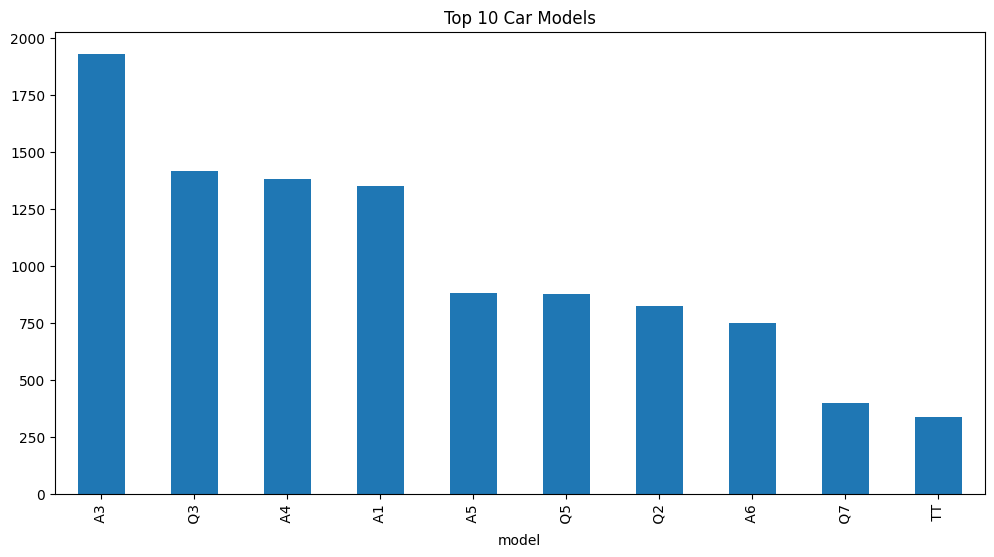

In [56]:
# Displaying a bar chart of the 10 most common car models
# value_counts() counts how many times each model appears, and head(10) selects the top 10
# This helps visualize the most frequent car models in the dataset

df['model'].value_counts().head(10).plot.bar(
    figsize=(12, 6),
    title='Top 10 Car Models'
)

# What I understood:
# This shows which car models appear the most, which can be useful for analyzing trends or popular vehicles in the dataset.


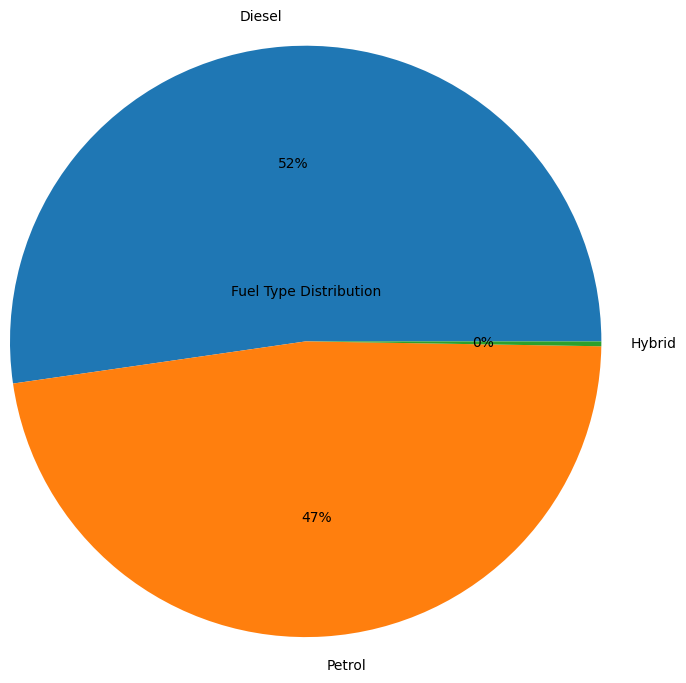

In [57]:
# Creating a pie chart to show the distribution of the top 4 fuel types
# value_counts().head(4) selects the 4 most common fuel types
# autopct adds percentage labels, and radius changes the size of the pie chart

df['fuelType'].value_counts().head(4).plot.pie(
    autopct='%1.0f%%',
    radius=2,
    ylabel=''  # Hides the label on the y-axis
)
plt.title('Fuel Type Distribution', y=0.6, fontsize=10)
plt.show()

# What I understood:
# This pie chart shows what portion of the dataset each fuel type makes up, making it easy to compare their usage visually.


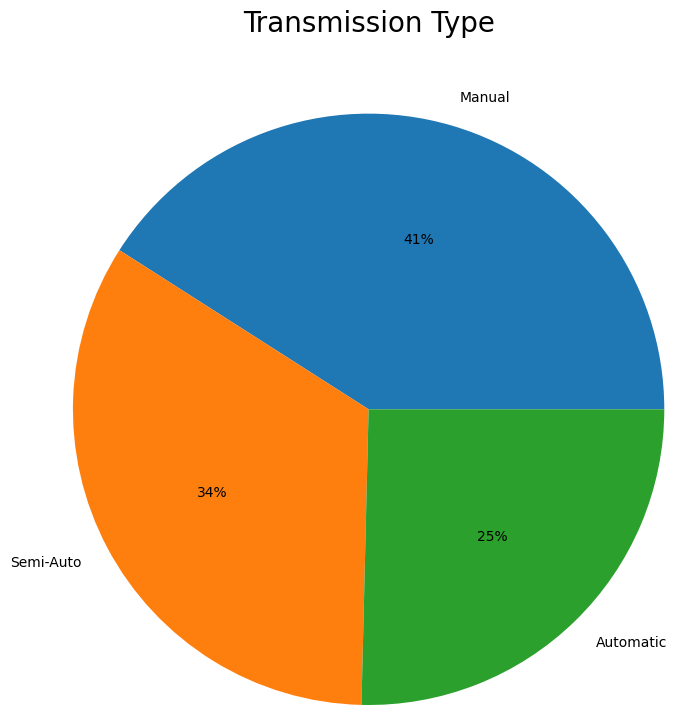

In [58]:
# Creating a pie chart to show the distribution of the top 4 transmission types
# value_counts()[0:4] selects the four most common transmission types
# autopct displays percentages on the chart, radius adjusts the size, and ylabel='' removes the y-axis label

df['transmission'].value_counts()[0:4].plot.pie(
    autopct='%1.0f%%',
    radius=2,
    ylabel=''
)
plt.title('Transmission Type', y=1.5, fontsize=20)
plt.show()

# What I understood:
# This visualization helps me see which transmission types (like manual or automatic) are most common in the dataset.
# A pie chart gives a clear sense of how the transmission types are distributed proportionally.


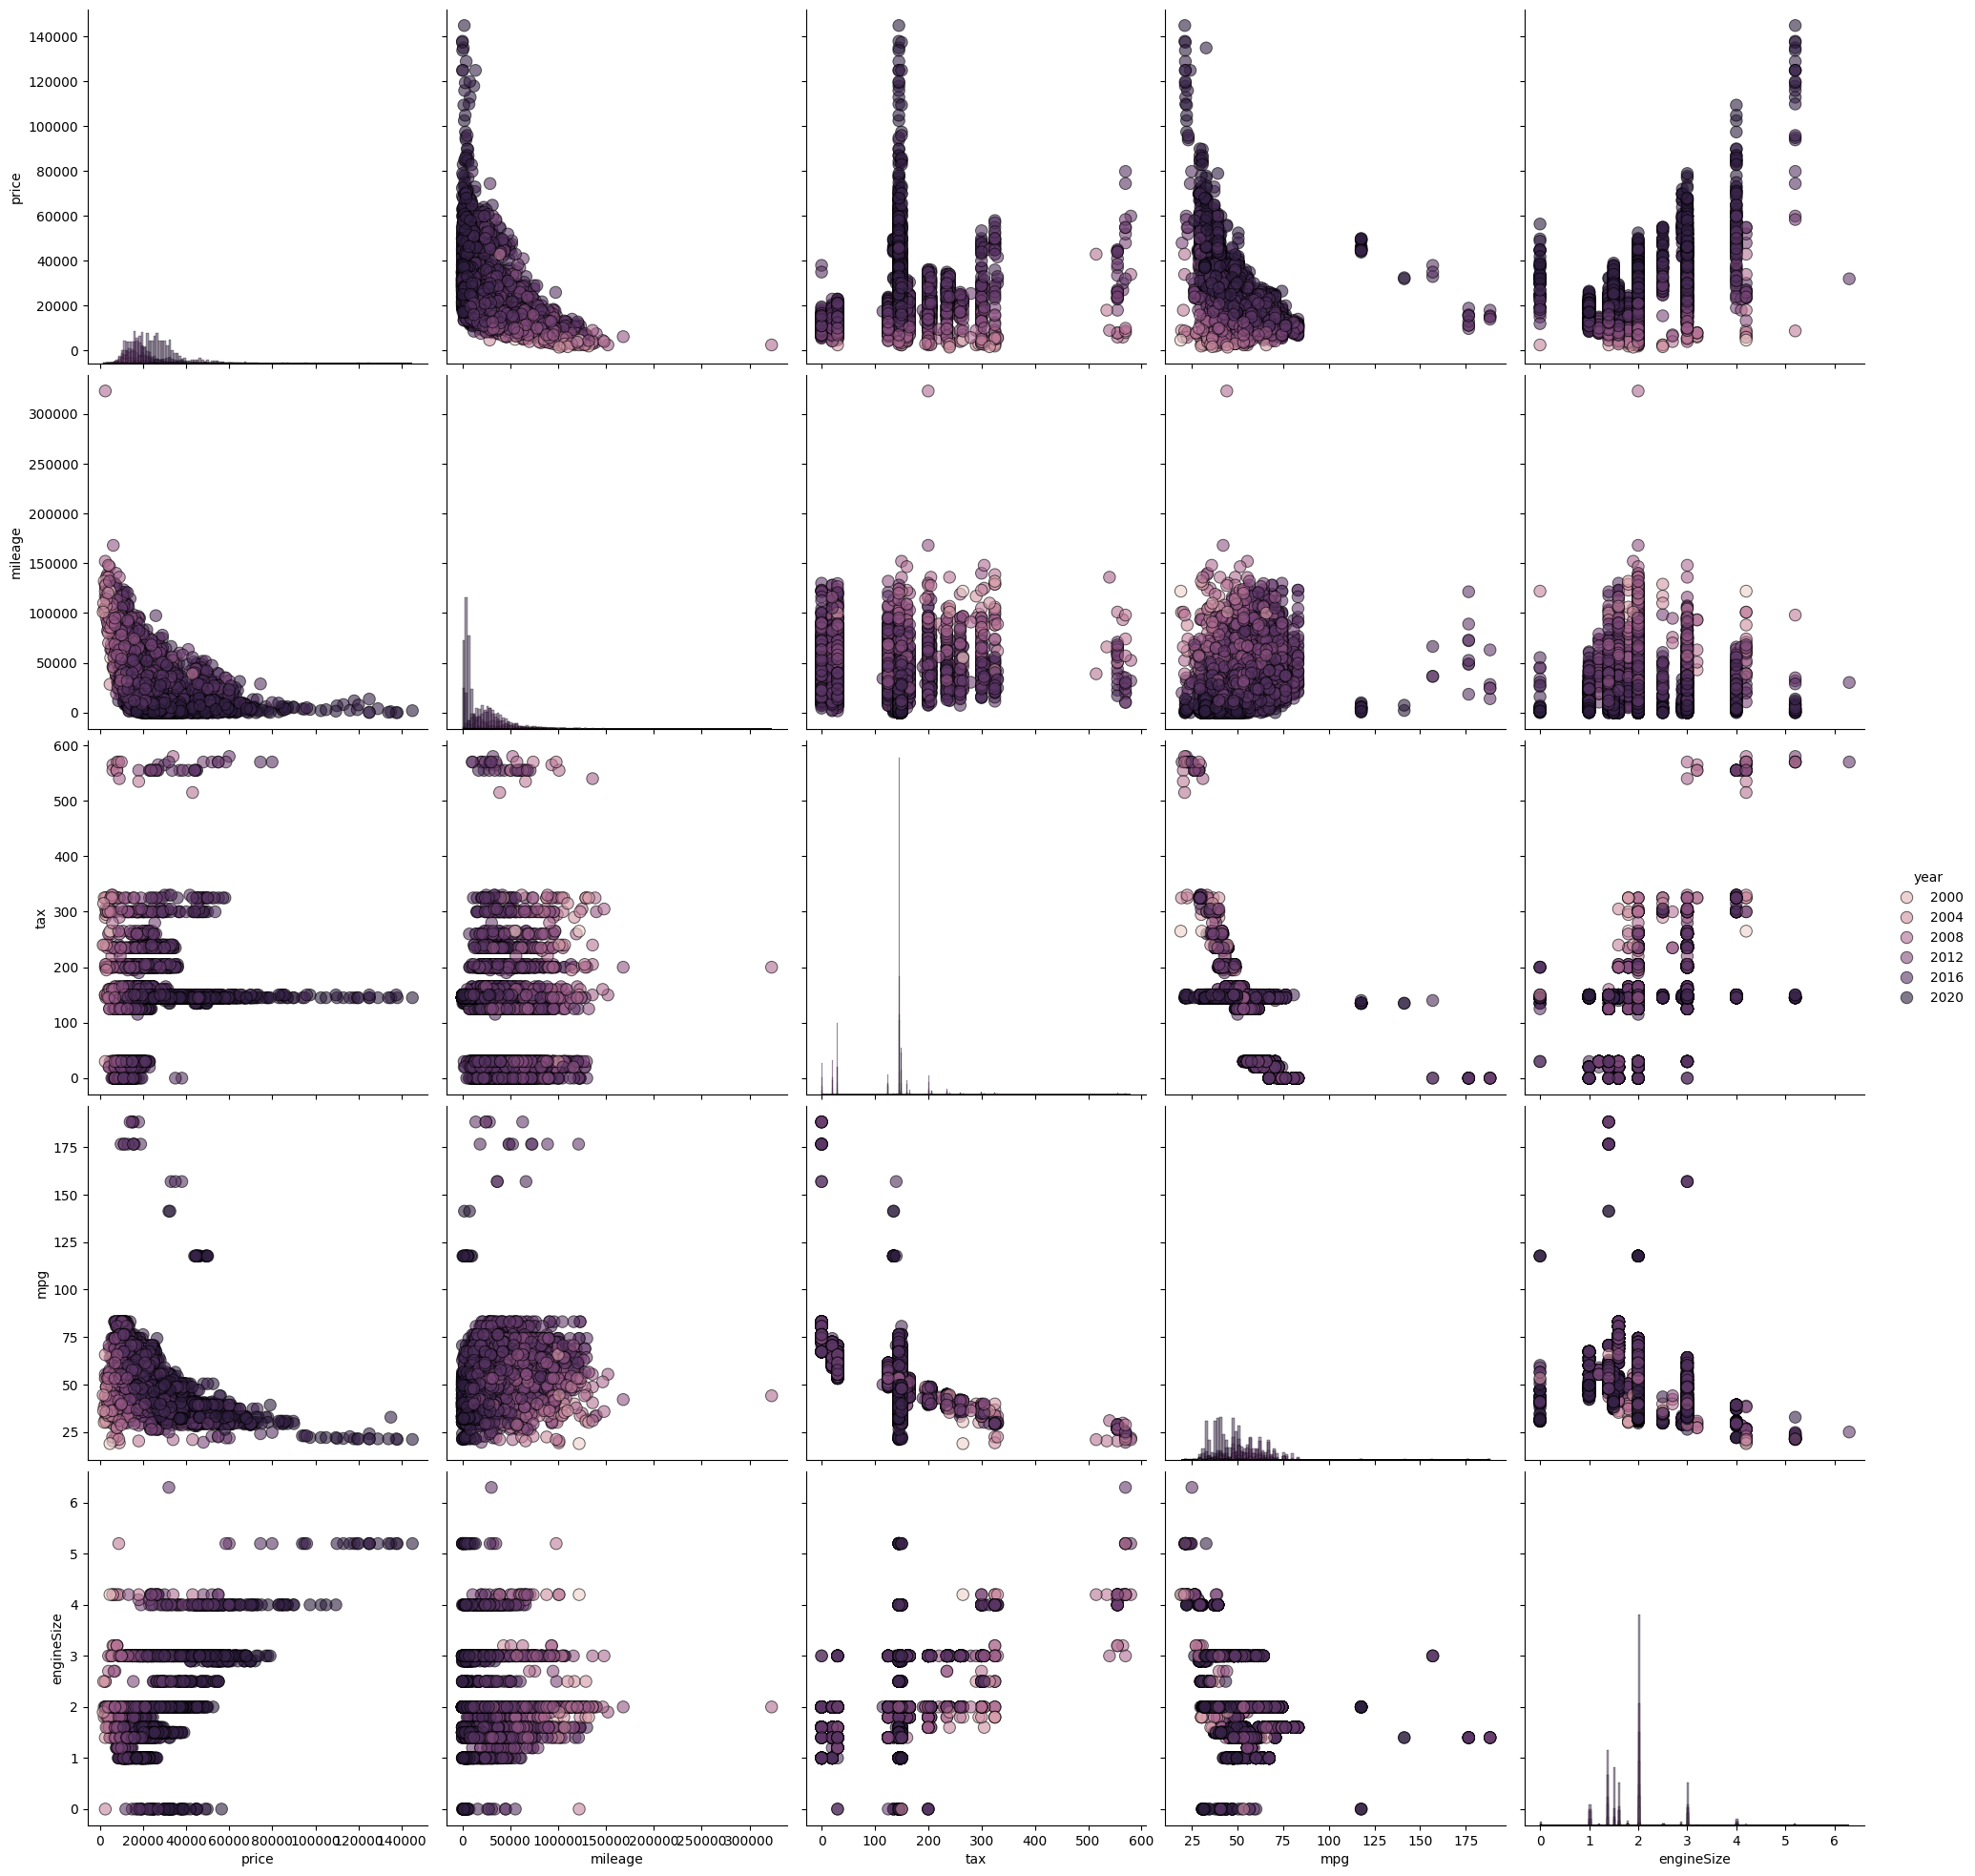

In [59]:
# Using seaborn's pairplot to explore relationships between features
# diag_kind='hist' sets histograms on the diagonal instead of KDE plots
# hue='year' colors the plots based on car year to show how data changes over time
# plot_kws is used to style the plots (opacity, size, border color)
# size=4 sets the figure size for each subplot

sns.pairplot(
    df,
    diag_kind='hist',
    hue='year',
    plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height=4
)

# What I understood:
# This gives a good overview of how different numerical features relate to each other.
# Coloring by 'year' helps identify trends or patterns based on car manufacturing years.


As you can see, we do some EDA and see the type of model and transmission and also fuel type. Moreover, visualize the correlation between columns.

## Data Cleaning
In the interest of time, and based on the result of `df.info()`, we *assume* data is clean, but in general we should clean our data first.

## Data Preprocessing
Next step in preparing our data would be to make all columns have numerical values.

To this end, we need to convert the categorical columns into numerical values.


In [60]:
# Converting categorical variables (except 'model') into one-hot encoded columns
# First, get all object-type (categorical) columns
# Then remove 'model' because we don't want to one-hot encode it
# For each of the remaining categorical columns, create dummy variables and add them to the DataFrame

to_one_hot_columns = list(df.select_dtypes(include="object").columns)
to_one_hot_columns.remove('model')

for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column])
    df[encoded_df.columns] = encoded_df

df.head()

# What I understood:
# One-hot encoding turns categorical variables into binary columns so that machine learning models can use them.
# For example, a 'fuelType' column with values like 'Petrol' and 'Diesel' becomes two separate columns with 0s and 1s.


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,False,True,False,False,False,True
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,True,False,False,True,False,False
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,False,True,False,False,False,True
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,True,False,False,True,False,False
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,False,True,False,False,False,True


In [61]:
# Checking the number of unique values in each categorical (object-type) column
# This helps me understand the diversity of values in each column before encoding

for col_name in list(df.select_dtypes(include="object").columns):
    print('Number of unique values in column %s is %d\n' % (col_name, len(df[col_name].unique())))

# What I understood:
# This step shows how many distinct categories exist in each object-type column.
# It helps decide whether one-hot encoding or label encoding is more appropriate.


Number of unique values in column model is 26

Number of unique values in column transmission is 3

Number of unique values in column fuelType is 3



In [62]:
df.shape

(10668, 15)

As can be seen, we have several new columns now, which correspond to the one-hot-encoded columns.

Now we drop all non-numerical columns (as we have encoded them) and check to make sure our data is all numeric.

In [63]:
# Creating two versions of the dataset: one with categorical encoding, and one with one-hot encoding
# Using deepcopy so that the original DataFrame remains unchanged during these operations

import copy

# Categorical encoding: converting the 'model' column into numeric codes
categorical_encoded_df = copy.deepcopy(df)
categorical_encoded_df['model_categorically_encoded'] = categorical_encoded_df['model'].astype('category').cat.codes

# One-hot encoding: turning the 'model' column into binary columns
df_all_one_hot = copy.deepcopy(df)
encoded_df = pd.get_dummies(df_all_one_hot['model'])
df_all_one_hot[encoded_df.columns] = encoded_df  # Adding the new binary columns to the dataset

print(df_all_one_hot.shape)

# What I understood:
# Label encoding assigns a unique number to each category, which is useful for algorithms that handle ordinal features.
# One-hot encoding creates separate columns for each category to avoid implying any order.
# This step prepares the dataset for machine learning models by transforming non-numeric features into numeric ones.


(10668, 41)


In [64]:
# Selecting which version of the encoded dataset to use for regression tasks
# If USING_CATEGORICAL_ENCODING is True, we use the version with label encoding
# Otherwise, we use the one-hot encoded version

USING_CATEGORICAL_ENCODING = False

if USING_CATEGORICAL_ENCODING:
    regression_df = categorical_encoded_df
else:
    regression_df = df_all_one_hot

# What I understood:
# This conditional lets me choose between two different encoding strategies depending on what I want to test or evaluate.
# For instance, tree-based models often work well with label encoding, while linear models prefer one-hot encoding.


In [65]:
# Removing all remaining non-numeric (object-type) columns from the regression dataset
# Machine learning models require numeric data, so we drop columns that are still strings or categories

non_numeric_columns = regression_df.select_dtypes(include="object").columns
regression_df.drop(non_numeric_columns, axis=1, inplace=True)

# What I understood:
# This step ensures that all columns in the dataset are numerical.
# It is necessary because most regression algorithms can't handle non-numeric data directly.


In [66]:
regression_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


## Normalization/Stadardization

In [67]:
# Applying standard scaling (z-score normalization) to 'year', 'mileage', and 'tax'
# StandardScaler transforms the data so that it has a mean of 0 and standard deviation of 1
# This is important for models sensitive to feature scales (e.g., linear regression)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = ['year', 'mileage', 'tax']
regression_df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
regression_df[standard_scaling_columns].describe()

# What I understood:
# Standardizing features helps improve model performance by normalizing different units and ranges.
# The describe() output shows that these columns now have mean around 0 and standard deviation around 1.


,year,mileage,tax
count,1.066800e+04,10668.000000,1.066800e+04
mean,-4.190257e-14,0.000000,1.864942e-17
std,1.000047e+00,1.000047,1.000047e+00
min,-9.274129e+00,-1.056249,-1.876087e+00
25%,-5.078338e-01,-0.802347,-1.505849e-02
50%,-4.644979e-02,-0.247924,2.827061e-01
75%,8.763182e-01,0.495115,2.827061e-01
max,1.337702e+00,12.685959,6.759087e+00


In [68]:
# Applying Min-Max scaling to 'mpg' and 'engineSize' so values are between 0 and 1
# MinMaxScaler is used here because some models (like neural networks) perform better with normalized input
# If categorical encoding is being used, also scale the encoded 'model' column

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_scaling_columns = ['mpg', 'engineSize']

if USING_CATEGORICAL_ENCODING:
    minmax_scaling_columns.append('model_categorically_encoded')

regression_df[minmax_scaling_columns] = scaler.fit_transform(regression_df[minmax_scaling_columns])
regression_df[minmax_scaling_columns].describe()

# What I understood:
# This scaling compresses values into a 0 to 1 range, which helps many algorithms converge faster and more reliably.
# It is especially useful when features have different units or wide value ranges.


,mpg,engineSize
count,10668.000000,10668.000000
mean,0.188135,0.306462
std,0.076445,0.095707
min,0.000000,0.000000
25%,0.129870,0.238095
50%,0.181228,0.317460
75%,0.236128,0.317460
max,1.000000,1.000000


## Pareparing Train and Test Sets

In [69]:
# Separating the target variable ('price') from the features
# This variable will be used as the label for training the regression model

car_prices = regression_df.pop('price')

# What I understood:
# In regression tasks, we need to separate the variable we want to predict (in this case, car price) from the input features.
# After this step, `regression_df` only contains the input features (X), and `car_prices` contains the target variable (y).


In [70]:
# Splitting the data into training and testing sets using a 50/50 split
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate its performance on unseen data

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(regression_df, car_prices, test_size=0.5)

print(X_train.shape)
print(X_test.shape)

# What I understood:
# Splitting the data is necessary to check how well the model performs on new, unseen data.
# A 50% test size means half the data is used for training, and the other half for testing.
# This helps in reducing overfitting and provides a fair evaluation of model performance.


(5334, 37)
(5334, 37)


## Regression

### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)

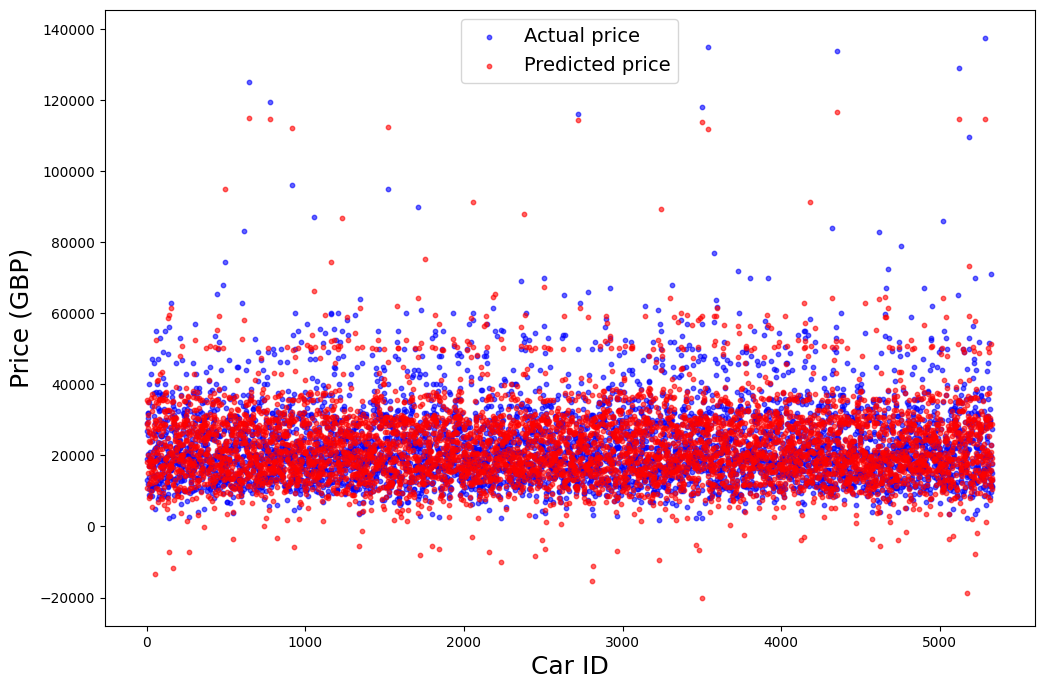

In [73]:
# Visualizing actual vs predicted car prices on the test set
# The plot shows how well the model is performing by comparing the predicted prices to the true prices

plt.figure(figsize=(12, 8))
x = np.arange(0, len(y_test), 1)
plt.scatter(x, y_test, c='b', s=10, alpha=0.6)
plt.scatter(x, predicted_prices_test, c='r', s=10, alpha=0.6)
plt.legend(['Actual price', 'Predicted price'], fontsize=14)
plt.ylabel('Price (GBP)', fontsize=18)
plt.xlabel('Car ID', fontsize=18)
plt.show()

# What I understood:
# This plot gives a visual comparison of real vs predicted prices for each car in the test set.
# If the red points (predictions) align closely with the blue points (actual), it means the model is performing well.


In [74]:
# Calculating RMSE (Root Mean Squared Error) for both the training and test sets
# RMSE measures the average error magnitude between predicted and actual values
# Lower RMSE means better performance

from sklearn.metrics import mean_squared_error

print('RMSE on the train set is: %.2f GBP' % pow(mean_squared_error(y_train, predicted_prices_train), 0.5))
print('RMSE on the test set is: %.2f GBP' % pow(mean_squared_error(y_test, predicted_prices_test), 0.5))

# What I understood:
# RMSE gives a sense of how far off the predictions are in terms of GBP.
# It's useful because it penalizes larger errors more heavily than smaller ones.
# Comparing train and test RMSE helps to identify if the model is overfitting or underfitting.


RMSE on the train set is: 3801.43 GBP
RMSE on the test set is: 3967.66 GBP


In [75]:
# Calculating MAE (Mean Absolute Error) for both training and test sets
# MAE gives the average error between predicted and actual prices without squaring the errors

from sklearn.metrics import mean_absolute_error

MAE_train = mean_absolute_error(y_train, predicted_prices_train)
MAE_test = mean_absolute_error(y_test, predicted_prices_test)

print('MAE on the train set is %.2f GBP' % MAE_train)
print('MAE on the test set is %.2f GBP' % MAE_test)

# What I understood:
# MAE is a straightforward metric showing how much, on average, the predictions are off.
# It is easier to interpret than RMSE, but it treats all errors equally.


MAE on the train set is 2541.23 GBP
MAE on the test set is 2581.27 GBP


In [76]:
# Calculating MAPE (Mean Absolute Percentage Error)
# MAPE shows the average percentage error between predicted and actual values
# This helps understand model performance in percentage terms, rather than absolute currency

from sklearn.metrics import mean_absolute_percentage_error

MAPE_train = mean_absolute_percentage_error(y_train, predicted_prices_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)

print('MAPE on the train set is %.3f' % MAPE_train)
print('MAPE on the test set is %.3f' % MAPE_test)

# What I understood:
# MAPE helps evaluate model performance relative to the size of the values being predicted.
# A lower percentage means better accuracy. It's helpful when working with data on different scales.


MAPE on the train set is 0.131
MAPE on the test set is 0.137


In [77]:
# Calculating R² Score (coefficient of determination) for the test set
# R² indicates how well the model's predictions match the actual values
# A value of 1.0 means perfect prediction, while 0.0 means no better than a horizontal line

from sklearn.metrics import r2_score

R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' % R2_score_test)

# What I understood:
# R² tells us what proportion of the variance in car prices the model is able to explain.
# A higher R² score means the model is doing a good job at capturing the relationship between features and price.


R2 Score is 0.886


Based on the website of the course:

10 Points: Linear Regression (try to reach R2-score above 0.8)

10 Points: Linear Regression (try to reach R2-score above 0.85)

So we get 20 points here and continue to Kernel regression.

### Kernel Regression

In [78]:
# Defining a function to clip prediction values within a reasonable range
# This is useful to filter out predictions that fall outside expected minimum and maximum values

def cap_vector(input_vec, max_val, min_val):
    output_vec = np.maximum(min_val, input_vec)   # Ensures no value is below the minimum
    output_vec = np.minimum(max_val, output_vec)  # Ensures no value is above the maximum
    return output_vec

# What I understood:
# This function helps make the model's output more realistic by avoiding extreme predictions.
# For example, it can prevent predicting a negative price or an unrealistically high one.


In [79]:
# Training a Kernel Ridge Regression model using a sigmoid kernel
# The sigmoid kernel is similar to what is used in neural networks (e.g., tanh activations)

if 1:  # Used here to allow for optional execution in some environments
    from sklearn.kernel_ridge import KernelRidge
    model = KernelRidge(kernel='sigmoid')  # Kernel function: tanh(gamma * <X_i, X_j> + coef0)
    model.fit(X_train, y_train)

# What I understood:
# Kernel Ridge Regression combines Ridge Regression with kernel tricks for non-linear relationships.
# The sigmoid kernel helps the model handle non-linear patterns in the data, which can improve performance in complex datasets.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [80]:
predicted_prices_train = cap_vector(model.predict(X_train),100000,0)
predicted_prices_test = cap_vector(model.predict(X_test),100000,0)

In [81]:
predicted_prices_test

array([18920.17871518, 15379.05961217, 20369.8359239 , ...,
        6608.8142814 , 13474.01880491,  7439.9827302 ])

In [82]:
R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.333


In [83]:
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prices_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)

print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.382
MAPE on the test set is 0.385


### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None,max_iter=120)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120, penalty=None)

In [85]:
predicted_prices_train = model.predict(X_train)      # We don't need the cap the values here, as they are naturally capped by sigmoid function.
predicted_prices_test = model.predict(X_test)

In [86]:
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prices_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.081
MAPE on the test set is 0.115


In [87]:
R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.873


Based on the website:

10 Points: Logistic Regression (try to reach with R2-score above 0.8)

Done!

### Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [89]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)

In [90]:
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prices_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.131
MAPE on the test set is 0.137


In [91]:
R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.886


Based on website:

10 Points: Ridge Regression (try to reach with R2-score above 0.75).

Done!

### LASSO Regression

In [92]:
from sklearn.linear_model import Lasso

In [93]:
model = Lasso(alpha=100)
model.fit(X_train, y_train)

Lasso(alpha=100)

In [94]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)

In [95]:
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prices_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.159
MAPE on the test set is 0.168


In [96]:
R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.781


Based on website:

10 Points: LASSO Regression (try to reach with R2-score above 0.75)

Done!

---
## Explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.

### Kernel Trick in Machine Learning

The **kernel trick** is a powerful technique used in machine learning algorithms, particularly in support vector machines (SVMs) and kernelized regression methods like **Support Vector Regression (SVR)** and **Kernel Ridge Regression**.

At its core, the kernel trick allows us to operate in a **high-dimensional feature space** without explicitly transforming the data. Instead of computing the mapping of inputs to this high-dimensional space, we use a **kernel function** to compute the inner product between pairs of data points as if they were mapped. This avoids the computational cost of directly working in that higher space.

#### Why is this helpful?

- Many real-world datasets have **non-linear relationships** that cannot be captured by standard linear models.
- By applying the kernel trick, we can effectively turn a **linear algorithm** into a **non-linear one**, enabling it to capture more complex patterns.
- This leads to **better generalization** and **improved performance** on regression tasks with non-linear data.

#### Common Kernel Functions

- **Linear Kernel**: \( K(x, x') = x^T x' \)
- **Polynomial Kernel**: \( K(x, x') = (x^T x' + c)^d \)
- **RBF (Gaussian) Kernel**: \( K(x, x') = \exp(-\gamma \|x - x'\|^2) \)
- **Sigmoid Kernel**: \( K(x, x') = \tanh(\alpha x^T x' + c) \)

These kernels help tailor the model to different kinds of data structures and relationships.
